# Advanced Model Architectures
> It's time to get introduced to more advanced architectures! You will create an autoencoder to reconstruct noisy images, visualize convolutional neural network activations, use deep pre-trained models to classify images and learn more about recurrent neural networks and working with text as you build a network that predicts the next word in a sentence. This is the Summary of lecture "Introduction to Deep Learning with Keras", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

### Tensors, layers, and autoencoders
- Tensors
    - main data structures used in deep learning.
    - Inputs/Outputs and transformations in neural networks are all presented using tensors
- Autoencoders
![ae](image/ae.png)
    - Use cases
        - Dimensionality reduction:
            - Smaller dimensional space representation of our inputs
        - De-noising data:
            - If trained with clean data, irrelevant noise will be filtered out during reconstruction
        - Anormaly detection
            - A poor reconstruction will result when the model is fed with unseen inputs

### It's a flow of tensors
If you have already built a model, you can use the `model.layers` and the `tf.keras.backend` to build functions that, provided with a valid input tensor, return the corresponding output tensor.

This is a useful tool when we want to obtain the output of a network at an intermediate layer.

For instance, if you get the input and output from the first layer of a network, you can build an `inp_to_out` function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.

So that's what you're going to do right now!

In [2]:
banknote = pd.read_csv('./dataset/banknotes.csv')
banknote.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
from sklearn.model_selection import train_test_split

X = banknote.drop(['class'], axis=1)
# Normalize data
X = ((X - X.mean()) / X.std()).to_numpy()
y = banknote['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_shape=(4, ), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [5]:
import tensorflow.keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

[array([[2.56386340e-01, 9.77274626e-02],
       [7.67114833e-02, 0.00000000e+00],
       [1.02363735e-01, 1.94181755e-01],
       [2.86214232e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.01176226e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [4.39168774e-02, 1.52974856e+00],
       [1.59465745e-02, 0.00000000e+00],
       [4.79816198e-01, 6.73501730e-01],
       [1.13737658e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [3.80388170e-01, 0.00000000e+00],
       [0.00000000e+00, 1.07400763e+00],
       [5.39357603e-01, 0.00000000e+00],
       [0.00000000e+00, 2.01699162e+00],
       [3.28764290e-01, 1.30101490e+00],
       [5.83040416e-01, 9.54400003e-03],
       [9.96602327e-02, 0.00000000e+00],
       [0.00000000e+00, 2.44491458e-01],
       [3.69870029e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000

### Neural separation
Put on your gloves because you're going to perform brain surgery!

Neurons learn by updating their weights to output values that help them better distinguish between the different output classes in your dataset. You will make use of the `inp_to_out()` function you just built to visualize the output of two neurons in the first layer of the Banknote Authentication `model` as it learns.

In [6]:
def plot():
    fig, axes = plt.subplots(1, 5, figsize=(16, 8))
    for i, a in enumerate(axes):
        a.scatter(layer_outputs[i][:, 0], layer_outputs[i][:, 1], c=y_test, edgecolors='none');
        a.set_title('Test Accuracy: {:3.1f} %'.format(float(test_accuracies[i]) * 100.));
    plt.tight_layout()

In [7]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
layer_outputs = []
test_accuracies = []

for i in range(0, 21):
    # Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    if i % 4 == 0:
        # Get the output of the first layer
        layer_outputs.append(inp_to_out([X_test])[0])
        
        # Evaluate model accuracy for this epoch
        test_accuracies.append(model.evaluate(X_test, y_test)[1])

412/412 [==============================] - 0s 39us/sample - loss: 0.2173 - accuracy: 0.9296


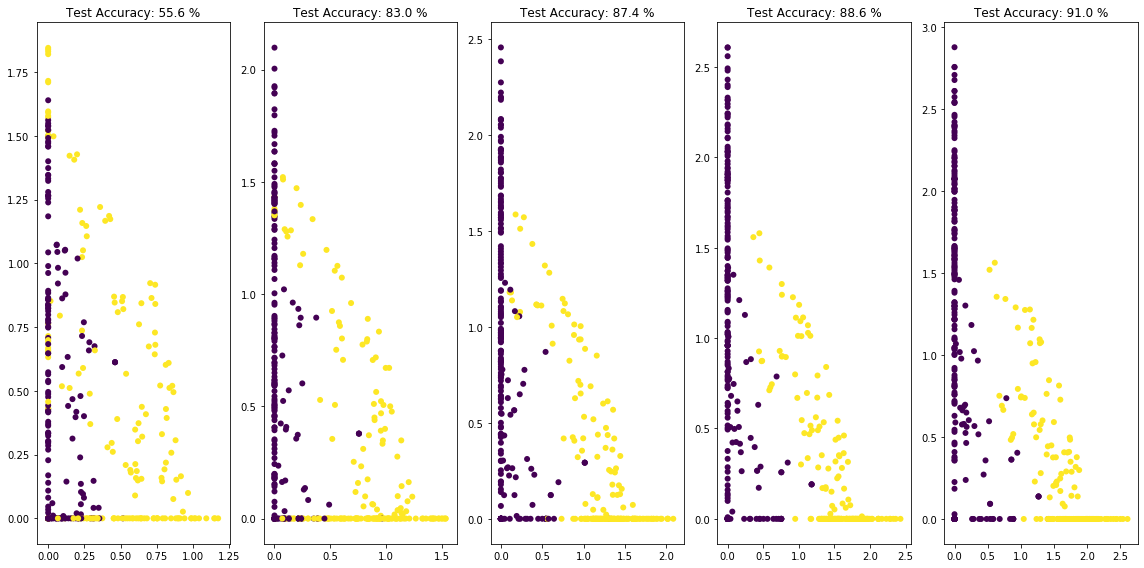

In [9]:
# Plot 1st vs 2nd neuron output
plot()

That took a while! If you take a look at the graphs you can see how the neurons are learning to spread out the inputs based on whether they are fake or legit dollar bills. (A single fake dollar bill is represented as a purple dot in the graph) At the start the outputs are closer to each other, the weights are learned as epochs go by so that fake and legit dollar bills get a different, further and further apart output.

### Building an autoencoder
Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

In [40]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test_noise = np.load('./dataset/X_test_MNIST_noise.npy')
X_test_noise = X_test_noise.reshape((len(X_test_noise), np.prod(X_test.shape[1:])))
y_test_noise = np.load('./dataset/y_test_MNIST.npy')

> Note: When I used 'adagrad' as an optimizer, it doesn't show correct answer. But after I changed 'adam', it works.

In [12]:
# Start with a sequential model
autoencoder = Sequential(name='autoencoder')

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(784, ), activation='relu'))

# Add an output layer with as many neurons as the original image pixels
autoencoder.add(Dense(784, activation='sigmoid'))

# Compile your model with adadelta
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize your model structure
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### De-noising like an autoencoder
Okay, you have just built an `autoencoder` model. Let's see how it handles a more challenging task.

First, you will build a model that encodes images, and you will check how different digits are represented with `show_encodings()`. To build the encoder you will make use of your autoencoder, that has already being trained. You will just use the first half of the network, which contains the input and the bottleneck output. That way, you will obtain a 32 number output which represents the encoded version of the input image.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

The digits in this noisy dataset look like this:
![noise](image/noisy_mnist_sample.png)

In [41]:
def show_encodings(encoded_imgs,number=1):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test_noise == number)]
    encoded_imgs = encoded_imgs[np.where(y_test_noise == number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')

In [32]:
# Train autoencoder
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test), verbose=0);

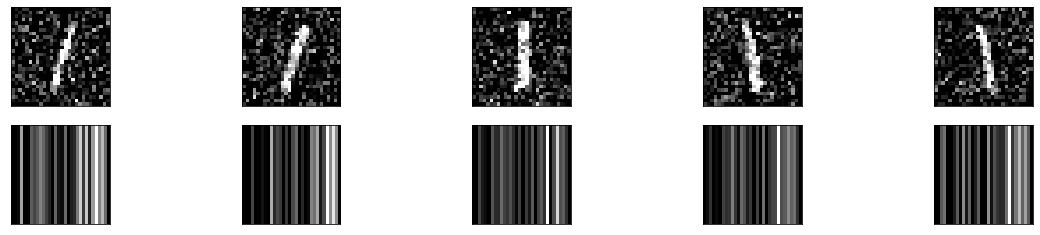

In [42]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number=1)

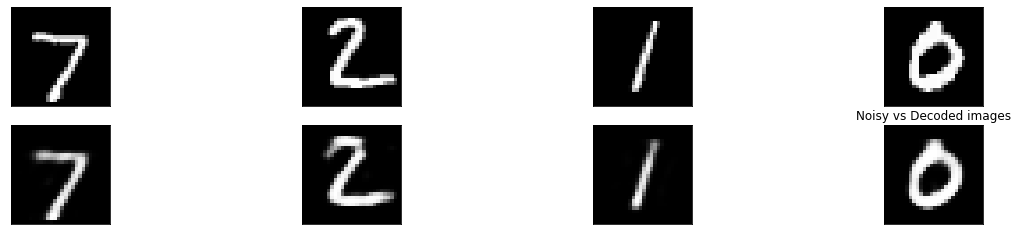

In [43]:
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model()

# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test)

# Plot noisy vs decoded images
compare_plot(X_test, decoded_imgs)

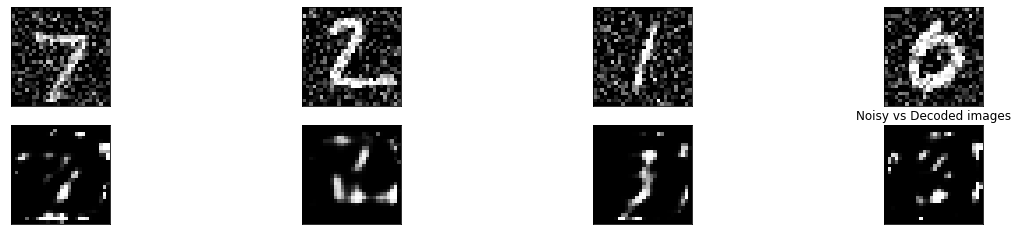

In [44]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

## Intro to CNNs
![cnn](image/cnn.png)

### Building a CNN model
Building a CNN model in Keras isn't much more difficult than building any of the models you've already built throughout the course! You just need to make use of convolutional layers.

You're going to build a shallow convolutional `model` that classifies the MNIST digits dataset. The same one you de-noised with your autoencoder! The images are 28 x 28 pixels and just have one channel, since they are black and white pictures.

Go ahead and build this small convolutional model!

In [38]:
from tensorflow.keras.layers import Conv2D, Flatten

# Instantiate model
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))

# Flattn the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation='softmax'))

### Looking at convolutions
Inspecting the activations of a convolutional layer is a cool thing. You have to do it at least once in your lifetime!

To do so, you will build a new model with the Keras Model object, which takes in a list of inputs and a list of outputs. The output you will provide to this new model is the first convolutional layer outputs when given an MNIST digit as input image.

Let's look at the convolutional masks that were learned in the first convolutional layer of this model!

In [39]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                92170     
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train, [-1, 28, 28, 1])
X_test = np.reshape(X_test, [-1, 28, 28, 1])

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32);

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0127 - accuracy: 0.9992
Epoch 2/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0118 - accuracy: 0.9992
Epoch 3/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0138 - accuracy: 0.9990
Epoch 4/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0121 - accuracy: 0.9992
Epoch 5/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0195 - accuracy: 0.9991
Epoch 6/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0108 - accuracy: 0.9994
Epoch 7/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0154 - accuracy: 0.9991
Epoch 8/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0130 - accuracy: 0.9993
Epoch 9/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0167 - accuracy: 0.9991
Epoch 10/30
60

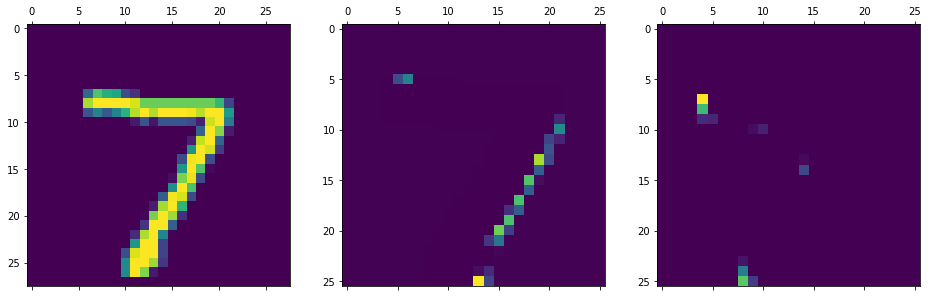

In [59]:
# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# Build a model using the model's input and the first layer output
first_layer_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=first_layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

fig, axs = plt.subplots(1, 3, figsize=(16, 8))

# Plot the activations of first digit of X_test for the 15th filter
axs[1].matshow(activations[0,:,:,14], cmap = 'viridis');

# Do the same but for the 18th filter now
axs[2].matshow(activations[0,:,:,17], cmap = 'viridis');

axs[0].matshow(X_test[0,:,:,0], cmap='viridis');

Each neuron filter of the first layer learned a different convolution. The 15th filter (a.k.a convolutional mask) learned to detect horizontal traces in your digits. On the other hand, filter 18th seems to be checking for vertical traces.

### Preparing your input image
The original ResNet50 model was trained with images of size 224 x 224 pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.

When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: (batch-size, width, height, channels),`np.expand_dims` with parameter `axis = 0` adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.

You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by ResNet50.
![dog](image/dog.png)

In [61]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img('./dataset/dog.png', target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis=0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

### Using a real world model
Okay, so Ivy's picture is ready to be used by ResNet50. It is stored in `img_ready` and now looks like this:
![dogp](image/dog_processed.png)
ResNet50 is a model trained on the Imagenet dataset that is able to distinguish between 1000 different labeled objects. ResNet50 is a deep model with 50 layers, you can check it in 3D [here](https://tensorspace.org/html/playground/resnet50.html).
It's time to use this trained model to find out Ivy's breed!

In [63]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02088364', 'beagle', 0.9073764), ('n02089867', 'Walker_hound', 0.06626676), ('n02089973', 'English_foxhound', 0.018850898)]


### Custom dog image

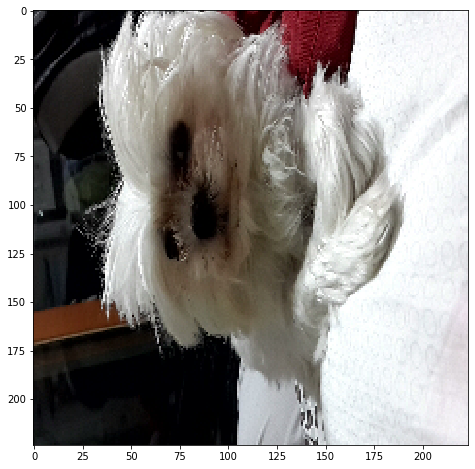

In [67]:
# Load the image with the right target size for your model
img = image.load_img('./dataset/grace.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_expanded = np.expand_dims(img_array, axis=0)
img_ready = preprocess_input(img_expanded)
plt.imshow(img);

In [68]:
# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02085936', 'Maltese_dog', 0.17497538), ('n02098286', 'West_Highland_white_terrier', 0.12481658), ('n02086240', 'Shih-Tzu', 0.09362568)]


## Intro to LSTMs
- Recurrent Neural Network (RNN)
![rnn](image/rnn.png)
- Long Short Term Memory (LSTM)
![lstm](image/lstm.png)
- When to use LSTM?
    - Image captioning
    - Speech to text
    - Text translation
    - Document summarization
    - Text generation
    - Musical composition

### Text prediction with LSTMs
During the following exercises you will build a toy LSTM model that is able to predict the next word using a small text dataset. This dataset consist of cleaned quotes from the The Lord of the Ring movies.

You will turn this `text` into `sequences` of length 4 and make use of the Keras `Tokenizer` to prepare the features and labels for your model!

The Keras `Tokenizer` is already imported for you to use. It assigns a unique number to each unique word, and stores the mappings in a dictionary. This is important since the model deals with numbers but we later will want to decode the output numbers back into words.

In [106]:
text = '''
it is not the strength of the body but the strength of the spirit it is useless to meet revenge 
with revenge it will heal nothing even the smallest person can change the course of history all we have 
to decide is what to do with the time that is given us the burned hand teaches best after that advice about 
fire goes to the heart END
'''

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Split text into an array of words
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words) + 1):
    sentences.append(' '.join(words[i - 4: i]))
    
# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Turn sentences into a sequence of numbers
sequences = tokenizer.texts_to_sequences(sentences)
print("Sentences: \n {} \n Sequences: \n {}".format(sentences[:5], sequences[:5]))

Sentences: 
 ['it is not the', 'is not the strength', 'not the strength of', 'the strength of the', 'strength of the body'] 
 Sequences: 
 [[5, 3, 43, 1], [3, 43, 1, 6], [43, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 10]]


### Build your LSTM model
You've already prepared your sequences of text. It's time to build your LSTM model!

Remember your sequences had 4 words each, your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an `Embedding` layer that will essentially learn to turn words into vectors. These vectors will then be passed to a simple `LSTM` layer. Our output is a `Dense` layer with as many neurons as words in the vocabulary and `softmax` activation. This is because we want to obtain the highest probable next word out of all possible words.

In [113]:
vocab_size = len(tokenizer.word_counts) + 1
vocab_size

46

In [127]:
from tensorflow.keras.layers import Embedding, LSTM

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim=vocab_size, input_length=3, output_dim=8))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 3, 8)              368       
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 46)                1518      
Total params: 8,190
Trainable params: 8,190
Non-trainable params: 0
_________________________________________________________________


In [128]:
from tensorflow.keras.utils import to_categorical

np_sequences = np.array(sequences)
print(np_sequences.shape)

X = np_sequences[:, :3]
y = np_sequences[:, 3]
y = to_categorical(y, num_classes=vocab_size)

(64, 4)


In [129]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=0);

In [130]:
def predict_text(test_text, model=model):
    if len(test_text.split()) != 3:
        print('Text input should be 3 words')
        return False
    # Turn the test_text into a sequence of numbers
    test_seq = tokenizer.texts_to_sequences([test_text])
    test_seq = np.array(test_seq)
    
    # Use the model passed as a parameter to predict the next word
    pred = model.predict(test_seq).argmax(axis=1)[0]
    
    # Return the word that maps to the prediction
    return tokenizer.index_word[pred]

In [131]:
predict_text('meet revenge with')

'revenge'

In [132]:
predict_text('the course of')

'history'

In [133]:
predict_text('strength of the')

'spirit'

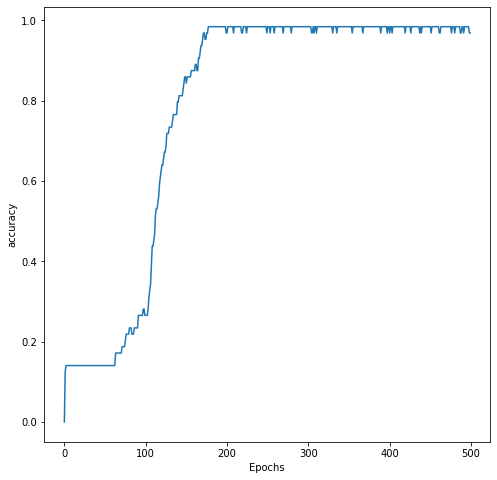

In [134]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)

plot_graphs(history, 'accuracy')

In [136]:
text = 'meet revenge with'
story = [text]
for i in range(100):
    result = predict_text(text)
    if result == "end":
        break;
    story.append(result)
    text += ' ' + result
    text = ' '.join(text.split()[1:])

story = " ".join(str(x) for x in story)
print('Final story : {}'.format(story))

Final story : meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart
